# 06 · Alle Jahre + Stichprobe in **einer** Abbildung

Ziel: Eine **gemeinsame** Gruppenbalken-Abbildung, die die harmonisierten Statista-Jahre
**2021 / 2022 / 2024** **plus** die **Stichprobe 2025** (Umfrage) pro Kategorie zeigt.

**Eigenschaften:**
- 0–100 % Skala, Prozentwerte an den Balken
- harmonisierte Kategorien (KANON) in definierter Reihenfolge
- Legende oberhalb, Fußnote mit Quellen
- Export als PNG nach `reports/figures/06_all_years_plus_sample.png`


In [1]:
# 06_all_years_plus_sample — Cell 1: Setup & Daten laden
from __future__ import annotations
from pathlib import Path
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Projektpfade (wie in 03/05)
BASE = Path.cwd().resolve().parents[0] if Path.cwd().name.lower()=="notebooks" else Path.cwd()
OUT  = BASE / "data" / "processed"
FIG  = BASE / "reports" / "figures"
FIG.mkdir(parents=True, exist_ok=True)

# Konfiguration & Kanon laden
CONFIG = json.loads((OUT / "project_config.json").read_text(encoding="utf-8"))
KANON  = CONFIG["kanon"]

# Datensätze laden
stat_wide   = pd.read_csv(OUT / "statista_harmonisiert_2021_2022_2024.csv").set_index("Kategorie").reindex(KANON).fillna(0.0)
sample_wide = pd.read_csv(OUT / "umfrage_2025_wide.csv").set_index("Kategorie").reindex(KANON).fillna(0.0)

def _to_int_if_year(c):
    s = str(c).strip()
    if s.endswith(".0") and s[:-2].isdigit():
        s = s[:-2]
    return int(s) if s.isdigit() else s

stat_wide.columns   = [_to_int_if_year(c) for c in stat_wide.columns]
sample_wide.columns = [_to_int_if_year(c) for c in sample_wide.columns]

YEARS = [y for y in [2021, 2022, 2024] if y in stat_wide.columns]
assert YEARS, "Keine Statista-Jahre gefunden. Prüfe statista_harmonisiert_2021_2022_2024.csv"
assert 2025 in sample_wide.columns, "Stichprobenjahr 2025 fehlt in umfrage_2025_wide.csv"

display(stat_wide.head(7))
display(sample_wide.head(7))


,2021,2022,2024
Kategorie,,,
Kleidung / Schuhe,57.0,78.0,106.0
"Elektronik (z. B. Smartphones, Haushaltsgeräte)",38.0,145.0,38.0
Lebensmittel / Getränke,33.0,28.0,16.0
Bücher / Medien / Software,0.0,92.0,25.0
Medikamente / Drogerieartikel,78.0,92.0,51.0
Hobby- & Freizeitartikel,83.0,71.0,57.0
Möbel / Wohnaccessoires,38.0,32.0,15.0


,2025
Kategorie,
Kleidung / Schuhe,69.230769
"Elektronik (z. B. Smartphones, Haushaltsgeräte)",43.589744
Lebensmittel / Getränke,15.384615
Bücher / Medien / Software,46.153846
Medikamente / Drogerieartikel,28.205128
Hobby- & Freizeitartikel,53.846154
Möbel / Wohnaccessoires,0.000000


In [2]:
# 06_all_years_plus_sample — Cell 2: Stil & Helfer
plt.rcParams.update({
    "figure.dpi": 120,
    "savefig.dpi": 300,
    "font.size": 11,
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "axes.grid": True,
    "grid.alpha": 0.2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "figure.autolayout": False,
})

def percent_axis(ax, axis="y", decimals=0, limit=(0, 100), pad_pct=0):
    lo, hi = limit
    hi_padded = hi + float(pad_pct)
    fmt = mtick.PercentFormatter(xmax=100, decimals=decimals)
    if axis == "y":
        ax.set_ylim(lo, hi_padded)
        ax.yaxis.set_major_formatter(fmt)
    else:
        ax.set_xlim(lo, hi_padded)
        ax.xaxis.set_major_formatter(fmt)

def label_bars(ax, decimals=1, rotate=0):
    fmt = f"%.{decimals}f %%"
    for c in ax.containers:
        ax.bar_label(c, fmt=fmt, padding=2, fontsize=8, rotation=rotate)

def footer(text, fig=None, y=-0.04):
    import matplotlib.pyplot as plt
    if fig is None:
        fig = plt.gcf()
    fig.text(0.01, y, text, ha="left", va="top", fontsize=9, color="#555")


In [3]:
# 06_all_years_plus_sample — Cell 3: Gemeinsame Tabelle bauen
combined = stat_wide[YEARS].copy()
combined["Stichprobe 2025"] = sample_wide[2025]

# Kategorienreihenfolge: nach Statista 2024 (falls vorhanden) aufsteigend
order_by = 2024 if 2024 in combined.columns else YEARS[-1]
combined = combined.sort_values(order_by, ascending=True)
display(combined.head(10))


,2021,2022,2024,Stichprobe 2025
Kategorie,,,,
Möbel / Wohnaccessoires,38.0,32.0,15.0,0.000000
Lebensmittel / Getränke,33.0,28.0,16.0,15.384615
Bücher / Medien / Software,0.0,92.0,25.0,46.153846
"Elektronik (z. B. Smartphones, Haushaltsgeräte)",38.0,145.0,38.0,43.589744
Medikamente / Drogerieartikel,78.0,92.0,51.0,28.205128
Hobby- & Freizeitartikel,83.0,71.0,57.0,53.846154
Kleidung / Schuhe,57.0,78.0,106.0,69.230769


Abbildung exportiert → D:\Q3_2025\data-analytics\project\reports\figures\06_all_years_plus_sample.png


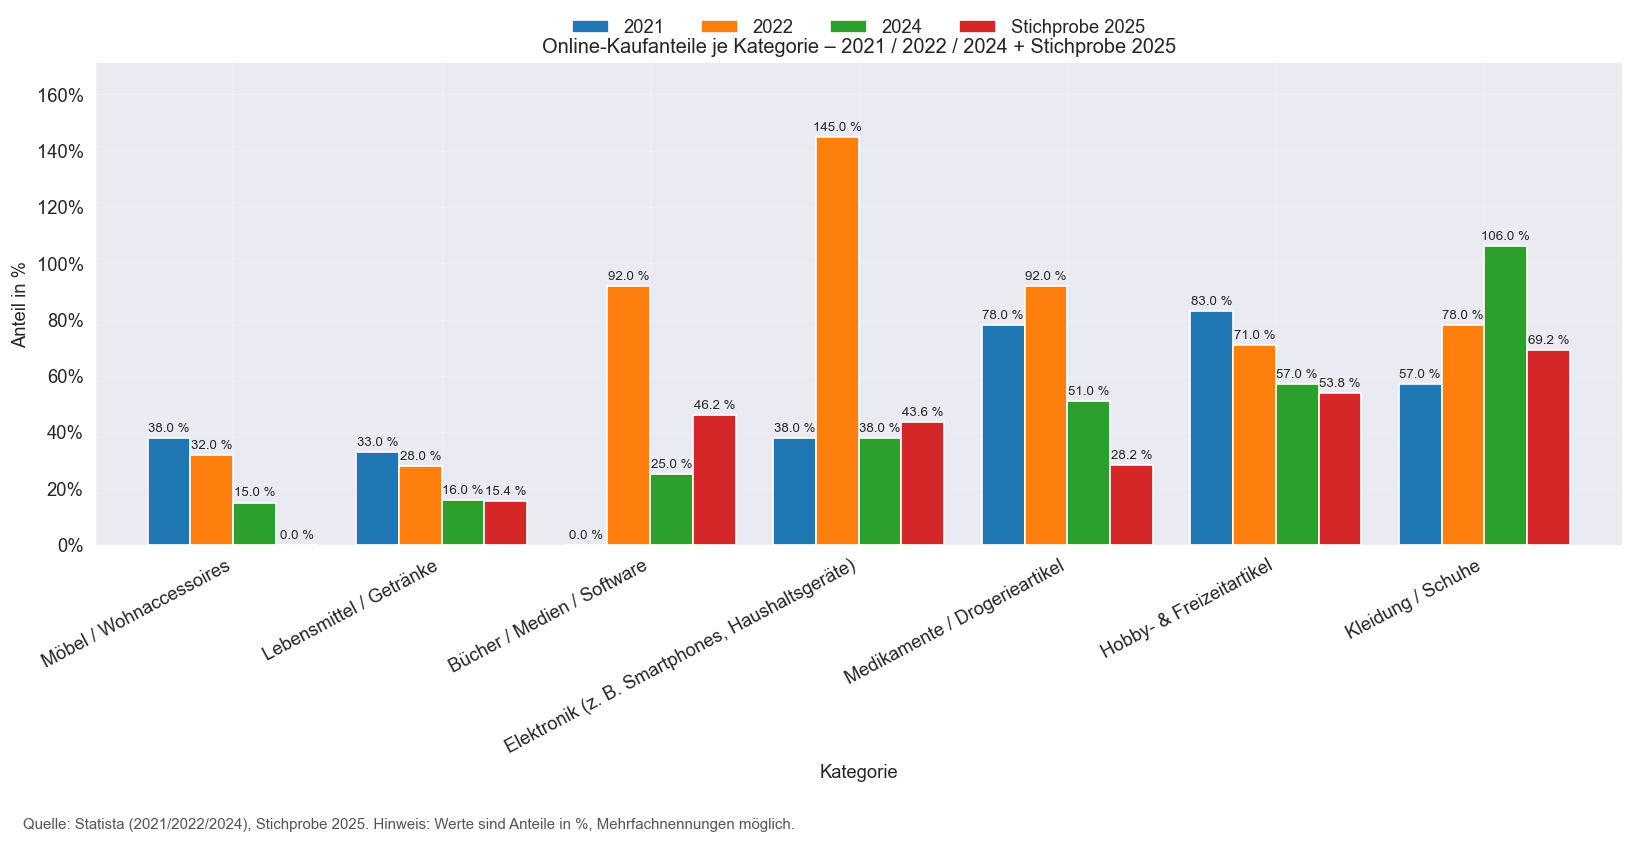

In [4]:
# 06_all_years_plus_sample — Cell 4: EIN gemeinsames Gruppenbalken-Diagramm
fig, ax = plt.subplots(figsize=(13.5, 6.5), constrained_layout=True)

combined.plot(kind="bar", ax=ax, width=0.82, zorder=2)

# Headroom für Labels
ymax = float(np.nanmax(combined.values))
ax.set_ylim(0, max(100, ymax * 1.18))
label_bars(ax, decimals=1, rotate=0)

ax.set_title("Online-Kaufanteile je Kategorie – 2021 / 2022 / 2024 + Stichprobe 2025")
ax.set_xlabel("Kategorie")
ax.set_ylabel("Anteil in %")
percent_axis(ax, axis="y", decimals=0, limit=(0, max(100, ymax * 1.18)))
plt.xticks(rotation=28, ha="right")

ax.legend(title="", frameon=False, ncols=min(4, len(combined.columns)), loc="lower center", bbox_to_anchor=(0.5, 1.02))

footer("Quelle: Statista (2021/2022/2024), Stichprobe 2025. Hinweis: Werte sind Anteile in %, Mehrfachnennungen möglich.")

PNG = FIG / "06_all_years_plus_sample.png"
plt.savefig(PNG, bbox_inches="tight", pad_inches=0.25, facecolor="white")
print("Abbildung exportiert →", PNG)


### Hinweise
- Wenn Balken-Labels kollidieren, `label_bars(..., rotate=90)` oder `figsize` anpassen.
- Reihenfolge ändern: `combined.sort_values(<Jahr>, ascending=...)`.
- Die y-Achse ist auf **0–100 %** begrenzt; Headroom wird dynamisch ergänzt.
